这里兴高采烈的来建模了，心想这不是挺简单的么，洒洒水啦~。但一动手就发现我已经输了。

In [ ]:
#首先想弄一个baseline,就用线性回归得啦。话说什么是baseline?
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#十则交叉看模型的性能
from sklearn.model_selection import cross_val_score

In [2]:
#读数据并替换'-'，因为线性回归不能接收缺失值，但树模型是可以接受带空值的特征的
car_x=pd.read_csv('E:\Machine Learning\car_train_data.csv')
car_x['notRepairedDamage']=car_x['notRepairedDamage'].replace('-',0)
car_x.head()

In [11]:
#载入标签
car_y=pd.read_csv('E:\Machine Learning\car_train_target.csv')
car_y.head()

,price
0,1850
1,3600
2,6222
3,2400
4,5200


In [12]:
#看一下线性模型，误差大的吓人
import numpy as np
lin_reg=LinearRegression()
lin_reg.fit(car_x,car_y)
y_pre=lin_reg.predict(car_x)
lin_mse = mean_squared_error(car_y,y_pre)
lin_rmse = np.sqrt(lin_mse) #平方根
print(lin_rmse)

4165.112076372765


In [13]:
#看了下预测结果，误差很大
some_data = car_x.iloc[:5]
some_labels = car_y.iloc[:5]
print('prediction:',lin_reg.predict(some_data))
print('labels:',some_labels.values)

prediction: [[ 1248.18160609]
 [ 4231.55435276]
 [10490.87458916]
 [ 7255.27279828]
 [11630.65061355]]
labels: [[1850]
 [3600]
 [6222]
 [2400]
 [5200]]


In [14]:
#不行再换，决策树模型
from sklearn.tree import DecisionTreeRegressor 
dtr_reg=DecisionTreeRegressor()
dtr_reg.fit(car_x,car_y)
dtr_pre=dtr_reg.predict(car_x)
dtr_mse = mean_squared_error(car_y,dtr_pre)
dtr_rmse = np.sqrt(dtr_mse) #平方根
#决策树回归，分分钟就过拟合了
print(dtr_rmse)

12.34494439931676


In [18]:
#惊人的准确率
print('prediction:',dtr_pre[:6])
print('labels:',car_y.iloc[:6])

prediction: [1850. 3600. 6222. 2400. 5200. 8000.]
labels:    price
0   1850
1   3600
2   6222
3   2400
4   5200
5   8000


In [19]:
#交叉验证看一下，到此过拟合有多严重
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtr_reg,car_x,car_y,scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)
print('rmse_scores\n',rmse_scores)
print('rmse_scores_mean\n',rmse_scores.mean())
print('rmse_scores_std\n',rmse_scores.std())
#误差还是很大的

rmse_scores
 [1940.93283397 1933.24291727 2000.69313749 1948.12326239 2222.57523752
 2173.21727325 2018.16584627 1987.11174987 2082.8980256  2065.04638822]
rmse_scores_mean
 2037.2006671836266
rmse_scores_std
 93.77707528590926


In [ ]:
#那试试随机森林
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=60, criterion='mse')
forest_reg.fit(x_train, log_y)
forest_pre = forest_reg.predict(x_val)
forest_mse = mean_squared_error(y_val.values, np.exp(forest_pre))
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)#n_estimators=10 mean_squared_error平方根为623
#随机森林效果很好，整个数据集MAE看一下

In [33]:
car_rfg_pre=forest_reg.predict(car_x)
car_y['rfg_pre']=car_rfg_pre
car_y['rfg_socre']=abs(car_y['price']-car_y['rfg_pre'])
print(car_y['rfg_socre'].mean())#262.27025538297653 哇，效果太好了，赶紧对验证集进行预测，结果上传，得分611，心态有点崩

262.27025538297653


In [36]:
#保存模型
from sklearn.externals import joblib
#lr是一个LogisticRegression模型
joblib.dump(forest_reg, r'E:\Machine Learning\forest_reg.pkl')
#model = joblib.load('forest_reg.pkl')

['E:\\Machine Learning\\forest_reg.pkl']

In [ ]:
#试一下据说效果很好的GBDT
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(car_x, car_y, test_size=0.1, random_state=18)
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbm0 = GradientBoostingRegressor(**params,random_state=18)
gbm0.fit(x_train, y_train.values)

print("tr-accuracy: %.4g" % np.sqrt(metrics.mean_squared_error(y_train.values, gbm0.predict(x_train))))      # Accuracy : 0.9855
#print("tr-AUC: %f" % metrics.roc_auc_score(y_train, gbm0.predict_proba(x_train)[:, 1]))      # AUC Score (Train): 0.910597

print("val-accuracy: %.4g" % np.sqrt(metrics.mean_squared_error(y_val, gbm0.predict(x_val))))

In [22]:
#十择验证后效果也不是很好
forest_scores = cross_val_score(forest_reg, car_x, car_y,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print(forest_rmse_scores) 
print(forest_rmse_scores.mean())#结果大于22180。说明训练集存在过拟合
print(forest_rmse_scores.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

[1534.27772446 1439.54812633 1379.18261851 1478.59843379 1609.05619821
 1432.95418084 1387.27779408 1439.94270738 1546.19870388 1465.28828909]
1471.2324776574446
69.0285072748444


In [61]:
#最后决定用随机森林，将训练数据分集，并尝试初步调参
from sklearn.ensemble import RandomForestRegressor
#n_estimators=40时有一个最小误差
x_train, x_val, y_train, y_val = train_test_split(car_x, car_y['log_y'], test_size=0.1, random_state=18)
forest_reg=RandomForestRegressor(n_estimators=100, criterion='mse',oob_score = True, n_jobs = -1)
forest_reg.fit(x_train,y_train)
forest_pre=forest_reg.predict(x_val)
forest_mse=mean_squared_error(np.exp(y_val),np.exp(forest_pre))
print(np.sqrt(forest_mse))
#from sklearn.model_selection import cross_val_score()
#forest_score=cross_val_score(forest_reg,car_x,car_y,scoring='neg_mean_squared_error',cv=10)
#forest_score_rmse=np.sqrt(-forest_score)
#print('forest_score_rmse_mean',forest_score_rmse.mean())
#print('forest_score_rmse_std',forest_score_rmse.std())
#最后100棵树时，误差最小，这里讲目标值取了一个对数，想让其更符合正态分布，最后误差下降了一些

1749193.7663438704


In [66]:
#将模型对testA再次预测
rdf_pre=pd.read_csv(r'E:\Machine Learning\used_car_submit.csv')
test_A=pd.read_csv('E:\Machine Learning\car_testA.csv')
test_A['notRepairedDamage']=test_A['notRepairedDamage'].replace('-',0)
test_pre=forest_reg.predict(test_A)
rdf_pre['test_pre']=np.exp(test_pre)
rdf_pre['test_pre']=rdf_pre['test_pre'].round(decimals=2)
rdf_pre.head()
#数据变化了一些

,SaleID,price,test_pre
0,150000,37869.783333,36271.14
1,150001,335.233333,344.40
2,150002,6448.866667,6447.99
3,150003,10861.016667,11832.41
4,150004,633.233333,619.85


In [69]:
#结果保存，再次上传，等分上升了10几分
rdf_pre.to_csv(r'E:\Machine Learning\used_car_submit2.csv',index=False)

In [56]:
#这里想找最优的森林树棵数
n_estimator=[10,20,30,40,50,60]
rmse=[]
for i in n_estimator:
    n=i
    forest_reg=RandomForestRegressor(n_estimators=n, criterion='mse')
    forest_reg.fit(x_train,y_train)
    forest_pre=forest_reg.predict(x_val)
    forest_mse=mean_squared_error(np.exp(y_val),np.exp(forest_pre))
    rmse.append(np.sqrt(forest_mse))
print('结束')#n=40时最小，但之后在试了一下，n=100时误差更小

结束


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(car_x, car_y, test_size=0.1, random_state=18)
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbm0 = GradientBoostingRegressor(**params,random_state=18)
gbm0.fit(x_train, y_train.values)

print("tr-accuracy: %.4g" % np.sqrt(metrics.mean_squared_error(y_train.values, gbm0.predict(x_train))))      # Accuracy : 0.9855
#print("tr-AUC: %f" % metrics.roc_auc_score(y_train, gbm0.predict_proba(x_train)[:, 1]))      # AUC Score (Train): 0.910597

print("val-accuracy: %.4g" % np.sqrt(metrics.mean_squared_error(y_val, gbm0.predict(x_val))))      # Accuracy : 0.9825
#print("val-AUC: %f" % metrics.roc_auc_score(y_val, gbm0.predict_proba(x_val)[:, 1]))    



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tr-accuracy: 1519
val-accuracy: 1552


In [30]:
car_pre=gbm0.predict(car_x)
car_y['gbm_pre']=car_pre
car_y['gbm_socre']=abs(car_y['price']-car_y['gbm_pre'])
print(car_y['gbm_socre'].mean())

831.6974037814969


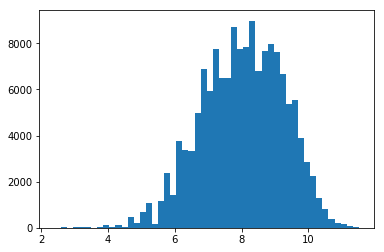

In [42]:
#目标值取对数，结果很符合正态分布。
plt.hist(log_y,bins=50)